In [ ]:
import numpy as np # For numerical computation
import pandas as pd # Data manipulation
import seaborn as sns # plotting
import scipy.io # reading matlab files in python
from scipy import signal #signal processing
from scipy.fftpack import fft, dct #signal processing

from sklearn.linear_model import LinearRegression #linear regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split # cross validation split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt # For plotting graphs(Visualization)
!pip install neurokit2


import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import zip_longest
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 5]  # Bigger images
import timeit
import csv



     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
def rmse(y_true, y_pred):
    """Computes the Root Mean Squared Error (RMSE)."""
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
sample_file = scipy.io.loadmat(f'/content/drive/MyDrive/Colab Notebooks/part_5.mat')
print(f'sample_file Data type: {type(sample_file)}')
print(f'sample_file keys:\n{sample_file.keys()}')

sample_file Data type: <class 'dict'>
sample_file keys:
dict_keys(['__header__', '__version__', '__globals__', 'p'])


In [ ]:
# Loading a sample .mat file to understand the data dimensions
test_sample = scipy.io.loadmat(f'/content/drive/MyDrive/Colab Notebooks/part_5.mat')['p']
print(f'test_sample Data type: {type(test_sample)}')
print(f'test_sample shape/dimensions: {test_sample.shape}')

test_sample Data type: <class 'numpy.ndarray'>
test_sample shape/dimensions: (1, 1000)


In [ ]:
print(f"Total Samples: {len(test_sample[0])}")
print(f"Number of readings in each sample(column): {len(test_sample[0][0])}")
print(f"Number of samples in each reading(ECG): {len(test_sample[0][0][2])}")

temp_mat = test_sample[0, 999]
print (temp_mat.shape)
temp_length = temp_mat.shape[1]
sample_size = 125


print(temp_length)
print((int)(temp_length/sample_size))


Total Samples: 1000
Number of readings in each sample(column): 3
Number of samples in each reading(ECG): 69000
(3, 22000)
22000
176


In [ ]:
sample_size = 125
ppg = []
for i in range(1000):
    temp_mat = test_sample[0, i]
    temp_length = temp_mat.shape[1]
    for j in range((int)(temp_length/sample_size)):
        temp_ppg = temp_mat[0, j*sample_size:(j+1)*sample_size]
        ppg.append(temp_ppg)

In [ ]:
ecg = []
bp = []
sbp = [] #Systolic Blood Pressure
dbp = [] #Diastolic Blood Pressue
size = 125 #sample size

for i in range(1000):
    temp_mat = test_sample[0, i]
    temp_length = temp_mat.shape[1]
    for j in range((int)(temp_length/sample_size)):
        temp_ecg = temp_mat[2, j*size:(j+1)*size]
        temp_bp = temp_mat[1, j*size:(j+1)*size]
        
        max_value = max(temp_bp)
        min_value = min(temp_bp)
        
        sbp.append(max_value)
        dbp.append(min_value)
        ecg.append(temp_ecg)
        bp.append(temp_bp)


In [ ]:
ppg, ecg, bp = np.array(ppg).reshape(-1,1), np.array(ecg).reshape(-1,1), np.array(bp).reshape(-1,1)
sbp, dbp = np.array(sbp).reshape(-1,1), np.array(dbp).reshape(-1,1)
print(f'PPG_shape: {ppg.shape}\n ECG_shape: {ecg.shape}\n BP_shape: {bp.shape}')
print(f'Systolic-BP_shape: {sbp.shape},\n Diastolic-BP_shape: {dbp.shape}')
print(ecg)

PPG_shape: (32723000, 1)
 ECG_shape: (32723000, 1)
 BP_shape: (32723000, 1)
Systolic-BP_shape: (261784, 1),
 Diastolic-BP_shape: (261784, 1)
[[0.46480938]
 [0.45014663]
 [0.4198436 ]
 ...
 [0.42326491]
 [0.43010753]
 [0.42326491]]


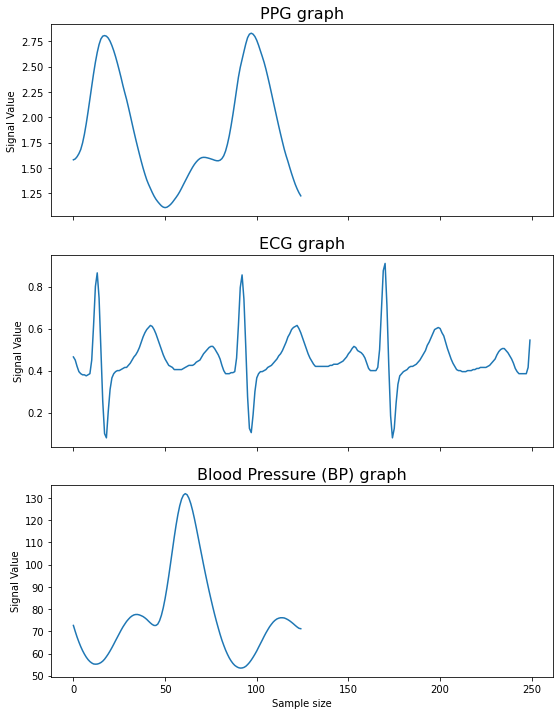

In [ ]:
##plotting sample ppg, ecg and bp signals
##using a sample size of 125
fig, ax = plt.subplots(3,1, figsize=(9,12), sharex=True)

ax[0].set_title('PPG graph', fontsize=16)
ax[0].set_ylabel('Signal Value')
ax[0].plot(ppg[:125])

ax[1].set_title('ECG graph', fontsize=16)
ax[1].set_ylabel('Signal Value')
ax[1].plot(ecg[:250])

ax[2].set_title('Blood Pressure (BP) graph', fontsize=16)
ax[2].set_ylabel('Signal Value')
ax[2].set_xlabel('Sample size')
ax[2].plot(bp[:125])

In [ ]:
arr = np.array(bp)
arr.shape
bp=arr.flatten()
bp.shape

(32723000,)

In [ ]:
header = ["P_Onsets","P","P_Offsets","Q","R_Onsets","R","R_Offsets","S","T_Onsets","T","T_Offsets","Systol","Diastole"]
with open('KaggleData_part5.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)


In [ ]:
clean_ecg=nk.ecg_clean(ecg, sampling_rate=125, method="neurokit")
data = ecg

In [ ]:
len(ecg)
#clean the signal using nwurokit2
len(clean_ecg)

32723000

In [ ]:
_, rpeaks = nk.ecg_peaks(clean_ecg[0:2000],sampling_rate=125)

#deteting QRS complex, p, t peaks
_, waves_peak = nk.ecg_delineate(clean_ecg[0:2000], rpeaks, sampling_rate=125,method='peak')



In [ ]:
size=len(ecg)
print(size)
for k in range(0,size,2000):
  #clean_ecg=nk.ecg_clean(ecg, sampling_rate=125, method="neurokit")
  #detecting r peaks
  ecg_part=clean_ecg[k:k+2000]
  _, rpeaks = nk.ecg_peaks(ecg_part,sampling_rate=125)

  # Delineate the ECG signal
  try:
    signal_dwt, waves_dwt = nk.ecg_delineate(ecg_part, rpeaks, sampling_rate=125, method="dwt")
    #deteting QRS complex, p, t peaks
    P=[]
    Q=[]
    R=[]
    S=[]
    T=[]
    P_Onsets=[];
    P_Offsets=[];
    R_Onsets=[];
    R_Offsets=[];
    T_Onsets=[];
    T_Offsets=[];

    for i in range(len(waves_dwt['ECG_P_Peaks'])):
        P.append(waves_dwt['ECG_P_Peaks'][i])
        Q.append(waves_dwt['ECG_Q_Peaks'][i])
        R.append(rpeaks['ECG_R_Peaks'][i])
        S.append(waves_dwt['ECG_S_Peaks'][i])
        T.append(waves_dwt['ECG_T_Peaks'][i])
        P_Onsets.append(waves_dwt['ECG_P_Onsets'][i]);
        P_Offsets.append(waves_dwt['ECG_P_Offsets'][i]);
        R_Onsets.append(waves_dwt['ECG_R_Onsets'][i]);
        R_Offsets.append(waves_dwt['ECG_R_Offsets'][i]);
        T_Onsets.append(waves_dwt['ECG_T_Onsets'][i]);
        T_Offsets.append(waves_dwt['ECG_T_Offsets'][i]);

    sig=bp[k:k+2000]
    #calculating peak and onsets
    info1 = nk.signal_findpeaks(sig, relative_height_min=0)
    info2 = nk.signal_findpeaks(sig, relative_height_max=0)
    peaks=info1["Peaks"]

    #plotting signals and peaks
    ###plt.plot(sig[:3000],label="raw PPG",c="y")
    #plt.plot(pc[:1000],label="raw PPG",c="y")
    #calculating Systole
    Systol=[]
    for i in peaks:
        Systol.append(sig[i])
        ###plt.scatter(i, sig[i], c="r", label="Systolic peaks")

    #inverting signal
    inv_data=[]
    Diastole=[]
    for i in sig:
        inv_data.append(1/i)
    info1 = nk.signal_findpeaks(inv_data, relative_height_min=0)
    peaks=info1["Peaks"]

    #calculating Diastole
    for i in peaks:
        Diastole.append(sig[i])
        ###plt.scatter(i, sig[i], c="c", label="Dystolic peaks")
    ###print(Systol)
    ###print(Diastole)

    #print(f'ECG: {len(R)}\n SBP: {len(Systol)}\n DBP: {len(Diastole)}')
    
    if len(Systol)==len(R) and len(Diastole)==len(R):
      d = [P_Onsets,P,P_Offsets,Q,R_Onsets,R,R_Offsets,S,T_Onsets,T,T_Offsets,Systol,Diastole]
      export_data = zip_longest(*d, fillvalue = '')
      with open('KaggleData_part5.csv', 'a', encoding="ISO-8859-1", newline='') as myfile:
            wr = csv.writer(myfile)
            wr.writerows(export_data)
      myfile.close()
  except:
    print("error",k)
    continue



In [ ]:
#calculating different time intervals
P=[]
Q=[]
R=[]
S=[]
T=[]

for i in range(len(waves_peak['ECG_P_Peaks'])):
    P.append(waves_peak['ECG_P_Peaks'][i])
    Q.append(waves_peak['ECG_Q_Peaks'][i])
    R.append(rpeaks['ECG_R_Peaks'][i])
    S.append(waves_peak['ECG_S_Peaks'][i])
    T.append(waves_peak['ECG_T_Peaks'][i])

len(R)
d = [P,Q,R,S,T]
export_data = zip_longest(*d, fillvalue = '')
with open('file.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("P","Q","R","S","T"))
      wr.writerows(export_data)
myfile.close()

d1 = [Systol,Diastole]
export_data = zip_longest(*d1, fillvalue = '')
with open('BP.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("Systole","Diastole"))
      wr.writerows(export_data)
myfile.close()

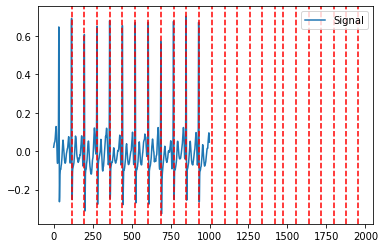

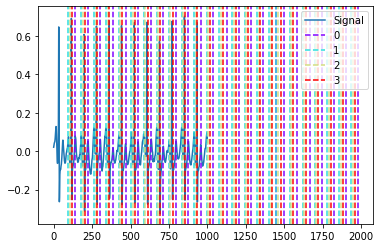

In [ ]:
#plotting the r peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], clean_ecg[:1000])



#plotting peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'], 
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], clean_ecg[:1000])

In [ ]:
print (sbp)

[[124.11286896]
 [126.8481388 ]
 [126.75045059]
 ...
 [ 86.0494988 ]
 [ 86.83176697]
 [ 86.98822061]]


In [ ]:
len(Systol)


24

In [ ]:
len(Diastole)


25